## How to Approach a Machine Learning Problem
Here's a strategy you can apply to approach any machine learning problem:

1. Explore the data and find correlations between inputs and targets <br>
2. Pick the right model, loss functions and optimizer for the problem at hand <br>
3. Scale numeric variables and one-hot encode categorical data <br>
4. Set aside a test set (using a fraction of the training set) <br>
5. Train the model <br>
6. Make predictions on the test set and compute the loss <br>
7. We'll apply this process to several problems in future tutorials. <br>

In [1]:
from urllib.request import urlretrieve

medical_charges_url = 'https://raw.githubusercontent.com/JovianML/opendatasets/master/data/medical-charges.csv'

urlretrieve(medical_charges_url, 'medical.csv')

('medical.csv', <http.client.HTTPMessage at 0x1b559d71350>)

In [ ]:
import pandas as pd

medical_df = pd.read_csv('data/medical.csv')

medical_df.head()
medical_df.info()

medical_df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [ ]:
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib

sns.set_style('darkgrid')
matplotlib.rcParams['figure.figSize'] = (10, 6)


In [10]:
medical_df.describe()

fig = px.histogram(medical_df, x='age', marginal='box', nbins=47, title='Distribution of Age')
fig.update_layout(bargap=0.1)
fig.show()


In [11]:
fig = px.histogram(medical_df, x='bmi', marginal='box', 
                   color_discrete_sequence=['red'], 
                   title='Distribution of BMI (Body Mass Index)')

fig.update_layout(bargap=0.1)
fig.show()

In [12]:
fig = px.histogram(medical_df, 
                   x='charges', 
                   marginal='box', 
                   color='smoker', 
                   color_discrete_sequence=['green', 'grey'], 
                   title='Annual Medical Charges')
fig.update_layout(bargap=0.1)
fig.show()

In [15]:
fig = px.histogram(medical_df, x='charges', color='sex', marginal='box',
                    color_discrete_sequence=['red', 'grey'],
                    title='Annual Medical Charges filtered by Sex and Region')
fig.update_layout(bargap=0.1)
fig.show()

# Smoker

In [16]:
medical_df.smoker.value_counts()

smoker
no     1064
yes     274
Name: count, dtype: int64

In [17]:
px.histogram(medical_df, x='smoker', color = 'sex', title='Smokers')

In [23]:
fig = px.scatter(medical_df, y='charges', x='bmi', color='smoker', opacity=0.8, hover_data=['sex'])
fig.update_layout(bargap=0.1)
fig.show()

## Computing a correlation between numeric Columns

In [24]:
medical_df.charges.corr(medical_df.age)

np.float64(0.2990081933306478)

In [25]:
medical_df.charges.corr(medical_df.bmi)

np.float64(0.19834096883362887)

In [30]:
smoker_values = {'no': 0, 'yes': 1}
smoker_numeric = medical_df.smoker.map(smoker_values)
medical_df.charges.corr(smoker_numeric)

np.float64(0.7872514304984778)

## Correlation Formula 

$$ r = \frac{\sum(x_i - \overline{x})(y_i - \overline{y})}{\sqrt{\sum({x_i - \overline{x}})^2 \sum({y_i - \overline{y})^2}}} $$

Where <br>
r - correlation Coefficient <br>
$ x_i, y_i $ - values in a sample <br>
$ \overline{x}, \overline{y}$ - Mean values

## Linear Regression using a Single Feature (age --> charges)

<Axes: title={'center': 'Age vs Charges'}, xlabel='age', ylabel='charges'>

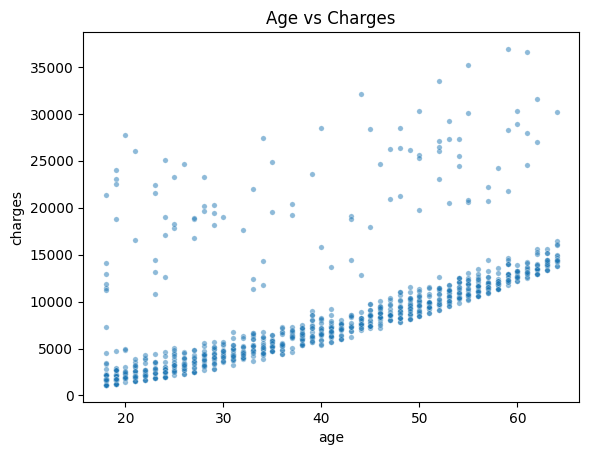

In [36]:
non_smokers_df = medical_df[medical_df.smoker == 'no']
plt.title('Age vs Charges')
sns.scatterplot(data = non_smokers_df, x='age', y='charges', alpha=0.5, s=15)

In [61]:
import numpy as np

def estimate_charges(x, w, b):
    return w *x + b

def gradient_descent(w, b, X, y, lr):
    n = len(X)
    y_pred = w * X + b
    error = y - y_pred
    # compute gradients
    dw = -(2/n) * np.dot(X, error)
    db = -(2/n) * np.sum(error)
    # update
    w -= lr * dw
    b -= lr * db
    return w, b

ages = non_smokers_df.age

w = 0
b = 0
learning_rate = 10

X = non_smokers_df.age.values
y = non_smokers_df.charges.values

w, b = 0, 0
learning_rate = 1e-4
epochs = 1000

for i in range(epochs):
    w, b = gradient_descent(w, b, X, y, learning_rate)
    if i % 100 == 0:
        y_pred = estimate_charges(X, w, b)
        mse = np.mean((y - y_pred)**2)
        print(f"Epoch {i}: MSE={mse:.2f}, w={w:.4f}, b={b:.4f}")

print("Final params:", w, b)

Epoch 0: MSE=58055810.56, w=77.0287, b=1.6869
Epoch 100: MSE=22234500.80, w=220.1556, b=0.1656
Epoch 200: MSE=22232261.72, w=220.2621, b=-4.5651
Epoch 300: MSE=22230032.76, w=220.3684, b=-9.2851
Epoch 400: MSE=22227813.88, w=220.4744, b=-13.9945
Epoch 500: MSE=22225605.01, w=220.5802, b=-18.6932
Epoch 600: MSE=22223406.13, w=220.6858, b=-23.3812
Epoch 700: MSE=22221217.18, w=220.7911, b=-28.0587
Epoch 800: MSE=22219038.13, w=220.8962, b=-32.7256
Epoch 900: MSE=22216868.92, w=221.0010, b=-37.3819
Final params: 221.1045843794301 -41.98126853149978


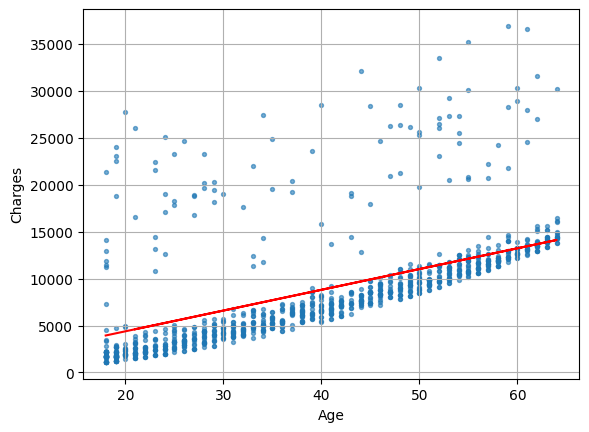

In [62]:
estimated_charges = estimate_charges(w, ages, b)
target = non_smokers_df.charges

plt.plot(ages, estimated_charges, 'r')
plt.scatter(ages, target, s=8, alpha=0.6)
plt.xlabel('Age')
plt.ylabel('Charges')
plt.grid()
plt.show()


## Linear Regression from Sk-learn

In [63]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()

help(model.fit)

Help on method fit in module sklearn.linear_model._base:

fit(X, y, sample_weight=None) method of sklearn.linear_model._base.LinearRegression instance
    Fit linear model.
    
    Parameters
    ----------
    X : {array-like, sparse matrix} of shape (n_samples, n_features)
        Training data.
    
    y : array-like of shape (n_samples,) or (n_samples, n_targets)
        Target values. Will be cast to X's dtype if necessary.
    
    sample_weight : array-like of shape (n_samples,), default=None
        Individual weights for each sample.
    
        .. versionadded:: 0.17
           parameter *sample_weight* support to LinearRegression.
    
    Returns
    -------
    self : object
        Fitted Estimator.



In [74]:
inputs, outputs = non_smokers_df[['age']], non_smokers_df.charges

model.fit(inputs, outputs, w)

predictions = model.predict(inputs)
predictions

array([2719.0598744 , 5391.54900271, 6727.79356686, ..., 2719.0598744 ,
       2719.0598744 , 3520.80661289], shape=(1064,))

In [76]:
from sklearn.metrics import root_mean_squared_error as rmse

print(rmse(target, predictions))

4662.505766636395


In [81]:
inputs, outputs = non_smokers_df[['age', 'children']], non_smokers_df['charges']

model = LinearRegression().fit(inputs, outputs)

predictions = model.predict(inputs)
loss = rmse(outputs, predictions)
print('Loss', loss)

Loss 4608.579056261982


In [82]:
fig = px.scatter_3d(non_smokers_df, x='age', y='bmi', z='charges')
fig.update_traces(marker_size=3, marker_opacity=0.5)
fig.show()

In [ ]:
smoker_codes = {'no': 0, 'yes': 1}
medical_df['smoker_code'] = medical_df.smoker.map(smoker_codes)
medical_df

,age,sex,bmi,children,smoker,region,charges,smoker_code
0,19,female,27.900,0,yes,southwest,16884.92400,1
1,18,male,33.770,1,no,southeast,1725.55230,0
2,28,male,33.000,3,no,southeast,4449.46200,0
3,33,male,22.705,0,no,northwest,21984.47061,0
4,32,male,28.880,0,no,northwest,3866.85520,0
...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830,0
1334,18,female,31.920,0,no,northeast,2205.98080,0
1335,18,female,36.850,0,no,southeast,1629.83350,0
1336,21,female,25.800,0,no,southwest,2007.94500,0


In [84]:
medical_df.charges.corr(medical_df.smoker_code)

np.float64(0.7872514304984778)

In [87]:
inputs, outputs = medical_df[['age', 'children']], medical_df['charges']

model = LinearRegression().fit(inputs, outputs)

predictions = model.predict(inputs)
loss = rmse(outputs, predictions)
print('Loss', loss)

Loss 11532.217203149561


In [ ]:
inputs, outputs = medical_df[['age', 'bmi', 'children', 'smoker_code']], medical_df['charges']

model = LinearRegression().fit(inputs, outputs)

predictions = model.predict(inputs)
loss = rmse(outputs, predictions)
print('Loss', loss) # 50% off

Loss 6056.439217188081


In [88]:
sex_codes = {'male': 1, 'female': 0}
medical_df['sex_code'] = medical_df.sex.map(sex_codes)

medical_df

,age,sex,bmi,children,smoker,region,charges,smoker_code,sex_code
0,19,female,27.900,0,yes,southwest,16884.92400,1,0
1,18,male,33.770,1,no,southeast,1725.55230,0,1
2,28,male,33.000,3,no,southeast,4449.46200,0,1
3,33,male,22.705,0,no,northwest,21984.47061,0,1
4,32,male,28.880,0,no,northwest,3866.85520,0,1
...,...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830,0,1
1334,18,female,31.920,0,no,northeast,2205.98080,0,0
1335,18,female,36.850,0,no,southeast,1629.83350,0,0
1336,21,female,25.800,0,no,southwest,2007.94500,0,0


In [ ]:
inputs, outputs = medical_df[['age', 'bmi', 'children', 'smoker_code', 'sex_code']], medical_df['charges']

model = LinearRegression().fit(inputs, outputs)

predictions = model.predict(inputs)
loss = rmse(outputs, predictions)
print('Loss', loss) 

Loss 6056.100708754546


### One Hot Encoding For region column

In [98]:
medical_df.region.unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

<Axes: xlabel='region', ylabel='charges'>

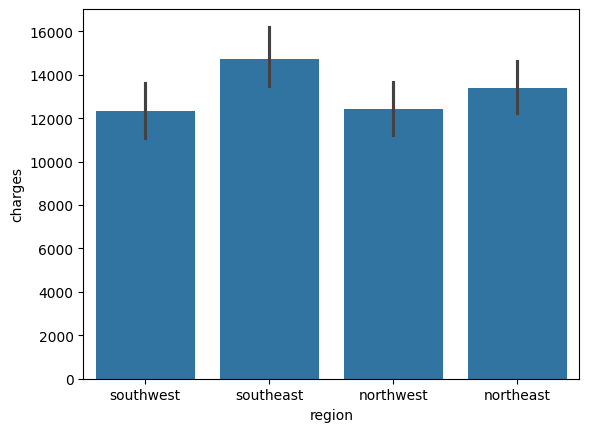

In [103]:
sns.barplot(medical_df, x='region', y='charges')

In [104]:
from sklearn import preprocessing

enc = preprocessing.OneHotEncoder()
enc.fit(medical_df[['region']])
enc.categories_

[array(['northeast', 'northwest', 'southeast', 'southwest'], dtype=object)]

In [108]:
enc.transform([['northeast'],['northwest']]).toarray() # type: ignore

d:\python projects\MachineLearning\LinearRegression\venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning:

X does not have valid feature names, but OneHotEncoder was fitted with feature names



array([[1., 0., 0., 0.],
       [0., 1., 0., 0.]])

In [ ]:
one_hot = enc.transform(medical_df[['region']]).toarray() # type: ignore
one_hot


array([[0., 0., 0., 1.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       ...,
       [0., 0., 1., 0.],
       [0., 0., 0., 1.],
       [0., 1., 0., 0.]], shape=(1338, 4))

In [114]:
medical_df[['northeast','northwest','southeast','southwest']] = one_hot
medical_df

,age,sex,bmi,children,smoker,region,charges,smoker_code,sex_code,northeast,northwest,southeast,southwest
0,19,female,27.900,0,yes,southwest,16884.92400,1,0,0.0,0.0,0.0,1.0
1,18,male,33.770,1,no,southeast,1725.55230,0,1,0.0,0.0,1.0,0.0
2,28,male,33.000,3,no,southeast,4449.46200,0,1,0.0,0.0,1.0,0.0
3,33,male,22.705,0,no,northwest,21984.47061,0,1,0.0,1.0,0.0,0.0
4,32,male,28.880,0,no,northwest,3866.85520,0,1,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830,0,1,0.0,1.0,0.0,0.0
1334,18,female,31.920,0,no,northeast,2205.98080,0,0,1.0,0.0,0.0,0.0
1335,18,female,36.850,0,no,southeast,1629.83350,0,0,0.0,0.0,1.0,0.0
1336,21,female,25.800,0,no,southwest,2007.94500,0,0,0.0,0.0,0.0,1.0


In [115]:
# Create inputs and targets
input_cols = ['age', 'bmi', 'children', 'smoker_code', 'sex_code', 'northeast', 'northwest', 'southeast', 'southwest']
inputs, targets = medical_df[input_cols], medical_df['charges']

# Create and train the model
model = LinearRegression().fit(inputs, targets)

# Generate predictions
predictions = model.predict(inputs)

# Compute loss to evalute the model
loss = rmse(targets, predictions)
print('Loss:', loss)

Loss: 6041.6796511744515


In [116]:
from sklearn.model_selection import train_test_split

inputs_train, inputs_test, targets_train, targets_test = train_test_split(inputs, targets, test_size=0.1)

# Create and train the model
model = LinearRegression().fit(inputs_train, targets_train)

# Generate predictions
predictions_test = model.predict(inputs_test)

# Compute loss to evalute the model
loss = rmse(targets_test, predictions_test)
print('Test Loss:', loss)

Test Loss: 5382.403052086472
